In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
file_path = "normalized_weather_data.csv"
df = pd.read_csv(file_path)

# Convert date column to datetime
df['last_updated'] = pd.to_datetime(df['last_updated'])
df['year'] = df['last_updated'].dt.year

In [3]:
def plot_temperature_trends(df):
    """Plot long-term temperature trends."""
    plt.figure(figsize=(12, 6))
    df.groupby('year')['temperature_celsius'].mean().plot(marker='o', linestyle='-')
    plt.title("Average Temperature Over the Years")
    plt.xlabel("Year")
    plt.ylabel("Temperature (°C)")
    plt.grid()
    plt.show()

In [4]:
def plot_regional_variation(df):
    """Compare temperature variations across different countries."""
    plt.figure(figsize=(12, 6))
    top_countries = df['country'].value_counts().index[:10]
    df_filtered = df[df['country'].isin(top_countries)]
    sns.boxplot(x='country', y='temperature_celsius', data=df_filtered)
    plt.xticks(rotation=45)
    plt.title("Temperature Variation Across Different Countries")
    plt.xlabel("Country")
    plt.ylabel("Temperature (°C)")
    plt.show()

In [5]:
def plot_air_quality_trends(df):
    """Analyze long-term air quality changes."""
    plt.figure(figsize=(12, 6))
    df.groupby('year')['air_quality_PM2.5'].mean().plot(marker='o', linestyle='-', color='red')
    plt.title("PM2.5 Air Quality Trends Over the Years")
    plt.xlabel("Year")
    plt.ylabel("PM2.5 Levels")
    plt.grid()
    plt.show()

In [6]:
def detect_extreme_weather(df):
    """Identify extreme temperature events."""
    extreme_temps = df[(df['temperature_celsius'] > df['temperature_celsius'].quantile(0.99)) |
                       (df['temperature_celsius'] < df['temperature_celsius'].quantile(0.01))]
    print("Extreme Temperature Events:")
    print(extreme_temps[['country', 'location_name', 'last_updated', 'temperature_celsius']].head(10))


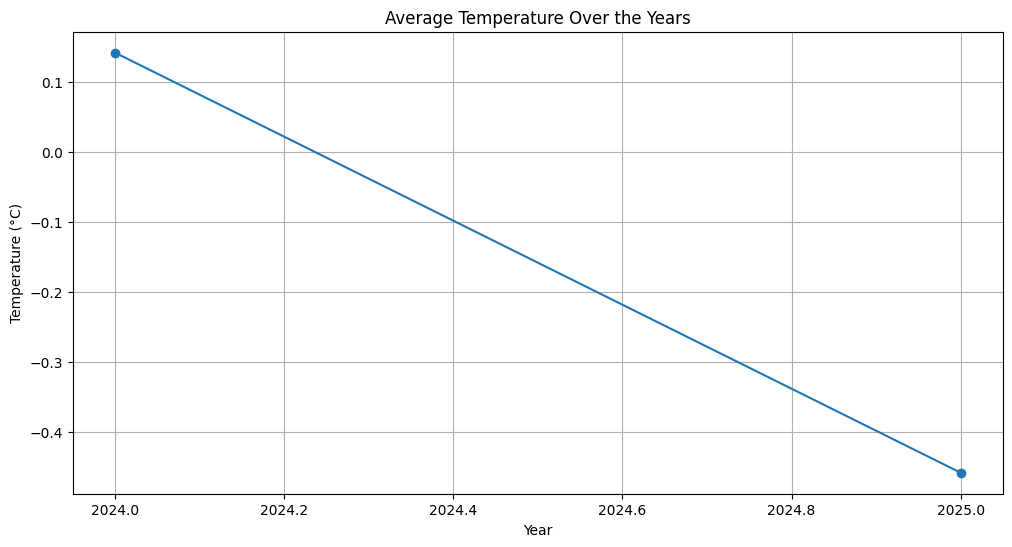

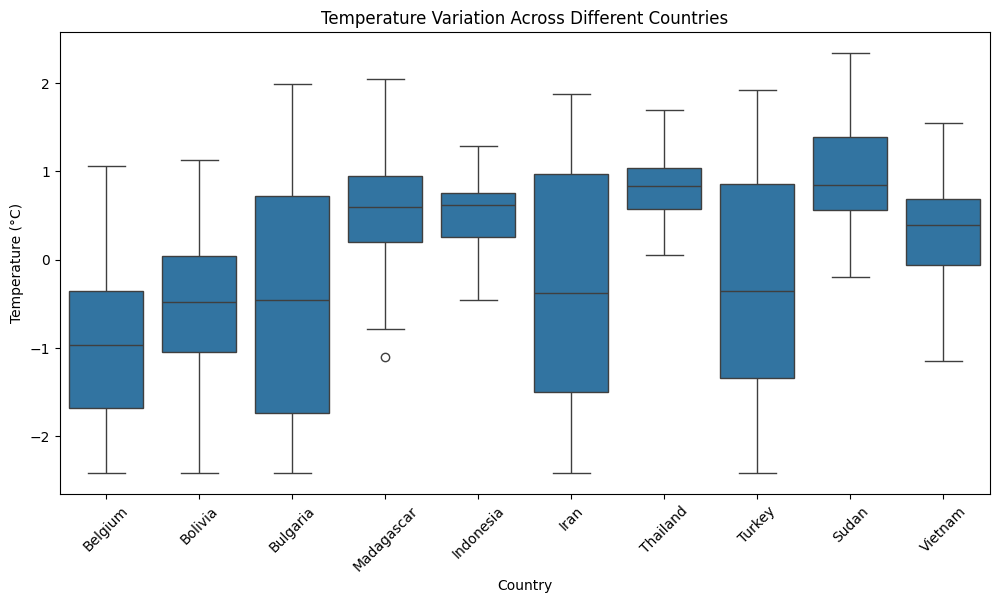

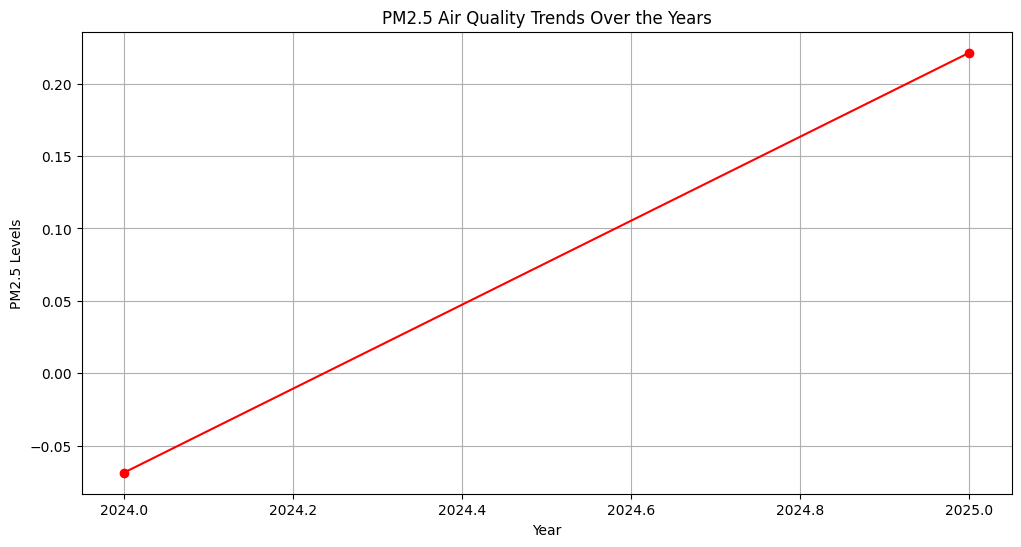

Extreme Temperature Events:
          country location_name        last_updated  temperature_celsius
77          India     New Delhi 2024-05-16 14:15:00             2.107689
229          Chad     N'djamena 2024-05-16 15:00:00             2.107689
346  Saudi Arabia        Riyadh 2024-05-16 17:15:00             2.000545
424          Chad     N'djamena 2024-05-17 17:00:00             2.107689
608  Burkina Faso   Ouagadougou 2024-05-18 14:30:00             1.968402
616          Chad     N'djamena 2024-05-18 15:30:00             2.214834
659         India     New Delhi 2024-05-18 20:00:00             2.000545
707         Niger        Niamey 2024-05-18 15:30:00             2.214834
747         Sudan      Khartoum 2024-05-18 16:30:00             2.161262
810          Chad     N'djamena 2024-05-19 15:00:00             2.129118


In [7]:
plot_temperature_trends(df)
plot_regional_variation(df)
plot_air_quality_trends(df)
detect_extreme_weather(df)